# Homework I

Joana Peixinho (ist1103335) & Miguel Fernandes (ist1103573)


## I. Pen and Paper [13v]

Consider the following dataset


![Decision Tree](./decision_tree.png)


### 1) Consider 𝐱1–𝐱7 to be training observations, 𝐱8–𝐱9 to be testing observations, 𝑦1– 𝑦5 to be input variables and 𝑦6 to be the target variable. Hint: you can use scipy.stats.multivariate_normal for multivariate distribution calculus

**a.) [3.5v] Learn a Bayesian classifier assuming: i) {𝑦1, 𝑦2}, {𝑦3, 𝑦4} and {𝑦5} sets of independent variables (e.g., 𝑦1 ⫫ 𝑦3 yet 𝑦1 ⫫ 𝑦2), and  ii) 𝑦1 × 𝑦2 ∈ ℝ2 is normally distributed.  Show all parameters (distributions and priors for subsequent testing).**



In [13]:
import numpy as np
from scipy.stats import multivariate_normal
# P(z|x) = P(x|z) * P(z) / P(x)

# Training data for y1, y2, y3, y4, y5, y6
train_data = np.array([
    [0.24, 0.36, 1, 1, 0, 'A'],
    [0.16, 0.48, 1, 0, 1, 'A'],
    [0.32, 0.72, 0, 1, 2, 'A'],
    [0.54, 0.11, 0, 0, 1, 'B'],
    [0.66, 0.39, 0, 0, 0, 'B'],
    [0.76, 0.28, 1, 0, 2, 'B'],
    [0.41, 0.53, 0, 1, 1, 'B'],
    
])

# Separate data by class A and B
class_A_data = train_data[train_data[:, -1] == 'A'][:, :-1].astype(float)
class_B_data = train_data[train_data[:, -1] == 'B'][:, :-1].astype(float)

# Calculate PRIOR probabilities [ P(z) = P(y6=A) and P(z) = P(y6=B)]
prior_A, prior_B = len(class_A_data) / len(train_data), len(class_B_data) / len(train_data)

# Calculate means and covariance matrices for y1, y2, y3, y4, y5 in class A and B
mean_A, mean_B = np.mean(class_A_data, axis=0), np.mean(class_B_data, axis=0)
cov_A, cov_B = np.cov(class_A_data, rowvar=False), np.cov(class_B_data, rowvar=False)

# Assuming 𝑦1 × 𝑦2 is normally distributed, estimate the parameters for this bivariate normal distribution
mean_y1_y2_A, mean_y1_y2_B = mean_A[:2], mean_B[:2]  # Mean of {𝑦1, 𝑦2} in class A, "" in class B
cov_y1_y2_A, cov_y1_y2_B = cov_A[:2, :2], cov_B[:2, :2]  # Covariance matrix of {𝑦1, 𝑦2} in class A, "" in class B

# Calculate the covariance matrix and the mean for y1 and y2
y1_y2_data = train_data[:, :2].astype(float)
cov_y1_y2 = np.cov(y1_y2_data, rowvar=False)
mean_y1_y2 = np.mean(y1_y2_data, axis=0)

# Define multivariate normal distribution for y1_y2_A, y1_y2_B and y1_y2
mvn_y1_y2_A = multivariate_normal(mean=mean_y1_y2_A, cov=cov_y1_y2_A)
mvn_y1_y2_B = multivariate_normal(mean=mean_y1_y2_B, cov=cov_y1_y2_B)
mvn_y1_y2 = multivariate_normal(mean=mean_y1_y2, cov=cov_y1_y2)

# Count total occurrences of class A and B
total_A = len(train_data[train_data[:, -1] == 'A'])
total_B = len(train_data[train_data[:, -1] == 'B'])


# Define a function to calculate probabilities
def calculate_probability(indexes_to_test, values_to_compare, total):
    return sum(all(observation[i] == v for i, v in zip(indexes_to_test, values_to_compare))\
                for observation in train_data\
            ) / total


# Probabilities for class A
p_y3_0_y4_0_A = calculate_probability([2,3,-1], ['0','0','A'], total_A)
p_y3_1_y4_0_A = calculate_probability([2,3,-1], ['1','0','A'], total_A)
p_y3_0_y4_1_A = calculate_probability([2,3,-1], ['0','1','A'], total_A)
p_y3_1_y4_1_A = calculate_probability([2,3,-1], ['1','1','A'], total_A)

p_y5_0_A = calculate_probability([4,-1], ['0','A'], total_A)
p_y5_1_A = calculate_probability([4,-1], ['1','A'], total_A)
p_y5_2_A = calculate_probability([4,-1], ['2','A'], total_A)

# Probabilities for class B
p_y3_0_y4_0_B = calculate_probability([2,3,-1], ['0','0','B'], total_B)
p_y3_1_y4_0_B = calculate_probability([2,3,-1], ['1','0','B'], total_B)
p_y3_0_y4_1_B = calculate_probability([2,3,-1], ['0','1','B'], total_B)
p_y3_1_y4_1_B = calculate_probability([2,3,-1], ['1','1','B'], total_B)

p_y5_0_B = calculate_probability([4,-1], ['0','B'], total_B)
p_y5_1_B = calculate_probability([4,-1], ['1','B'], total_B)
p_y5_2_B = calculate_probability([4,-1], ['2','B'], total_B)

# Probabilities for the entire dataset
p_y3_0_y4_0 = calculate_probability([2,3], ['0','0'], total_A + total_B)
p_y3_1_y4_0 = calculate_probability([2,3], ['1','0'], total_A + total_B)
p_y3_0_y4_1 = calculate_probability([2,3], ['0','1'], total_A + total_B)
p_y3_1_y4_1 = calculate_probability([2,3], ['1','1'], total_A + total_B)

p_y5_0 = calculate_probability([4], ['0'], total_A + total_B)
p_y5_1 = calculate_probability([4], ['1'], total_A + total_B)
p_y5_2 = calculate_probability([4], ['2'], total_A + total_B)

# Organize and print the probabilities neatly
print("Probabilities for Class A:")
print(f"p(y3=0, y4=0|A): {round(p_y3_0_y4_0_A, 4)}")
print(f"p(y3=1, y4=0|A): {round(p_y3_1_y4_0_A, 4)}")
print(f"p(y3=0, y4=1|A): {round(p_y3_0_y4_1_A, 4)}")
print(f"p(y3=1, y4=1|A): {round(p_y3_1_y4_1_A, 4)}")
print(f"p(y5=0|A): {round(p_y5_0_A, 4)}")
print(f"p(y5=1|A): {round(p_y5_1_A, 4)}")
print(f"p(y5=2|A): {round(p_y5_2_A, 4)}")

print("\nProbabilities for Class B:")
print(f"p(y3=0, y4=0|B): {round(p_y3_0_y4_0_B, 4)}")
print(f"p(y3=1, y4=0|B): {round(p_y3_1_y4_0_B, 4)}")
print(f"p(y3=0, y4=1|B): {round(p_y3_0_y4_1_B, 4)}")
print(f"p(y3=1, y4=1|B): {round(p_y3_1_y4_1_B, 4)}")
print(f"p(y5=0|B): {round(p_y5_0_B, 4)}")
print(f"p(y5=1|B): {round(p_y5_1_B, 4)}")
print(f"p(y5=2|B): {round(p_y5_2_B, 4)}")

print("\nProbabilities for the entire dataset:")
print(f"p(y3=0, y4=0): {round(p_y3_0_y4_0, 4)}")
print(f"p(y3=1, y4=0): {round(p_y3_1_y4_0, 4)}")
print(f"p(y3=0, y4=1): {round(p_y3_0_y4_1, 4)}")
print(f"p(y3=1, y4=1): {round(p_y3_1_y4_1, 4)}")
print(f"p(y5=0): {round(p_y5_0, 4)}")
print(f"p(y5=1): {round(p_y5_1, 4)}")
print(f"p(y5=2): {round(p_y5_2, 4)}")


# Print the calculated parameters and prior probabilities
print("\nParameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class A:")
print("Mean:", mean_y1_y2_A)
print("Covariance Matrix:")
print(cov_y1_y2_A)
print("\nParameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class B:")
print("Mean:", mean_y1_y2_B)
print("Covariance Matrix:")
print(cov_y1_y2_B)
print("\nPrior Probabilities:")
print("P(y6=A):", prior_A)
print("P(y6=B):", prior_B)


Probabilities for Class A:
p(y3=0, y4=0|A): 0.0
p(y3=1, y4=0|A): 0.3333
p(y3=0, y4=1|A): 0.3333
p(y3=1, y4=1|A): 0.3333
p(y5=0|A): 0.3333
p(y5=1|A): 0.3333
p(y5=2|A): 0.3333

Probabilities for Class B:
p(y3=0, y4=0|B): 0.5
p(y3=1, y4=0|B): 0.25
p(y3=0, y4=1|B): 0.25
p(y3=1, y4=1|B): 0.0
p(y5=0|B): 0.25
p(y5=1|B): 0.5
p(y5=2|B): 0.25

Probabilities for the entire dataset:
p(y3=0, y4=0): 0.2857
p(y3=1, y4=0): 0.2857
p(y3=0, y4=1): 0.2857
p(y3=1, y4=1): 0.1429
p(y5=0): 0.2857
p(y5=1): 0.4286
p(y5=2): 0.2857

Parameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class A:
Mean: [0.24 0.52]
Covariance Matrix:
[[0.0064 0.0096]
 [0.0096 0.0336]]

Parameters for Bivariate Normal Distribution 𝑦1 × 𝑦2 in Class B:
Mean: [0.5925 0.3275]
Covariance Matrix:
[[ 0.02289167 -0.00975833]
 [-0.00975833  0.03149167]]

Prior Probabilities:
P(y6=A): 0.42857142857142855
P(y6=B): 0.5714285714285714


In [14]:
# Define the observed test values of y1,y2
x8 = np.array([0.38, 0.52])
x9= np.array([0.42, 0.59]) 

# Calculate the likelihood P(x | z=A)
likelihood_A_x8 = mvn_y1_y2_A.pdf(x8)
likelihood_B_x8 = mvn_y1_y2_B.pdf(x8)
likelihood_A_x9 = mvn_y1_y2_A.pdf(x9)
likelihood_B_x9 = mvn_y1_y2_B.pdf(x9)

print(f"The likelihood P(x8 | z=A) is {round(likelihood_A_x8, 4)}")
print(likelihood_A_x8 /9 * 3/7)
print(f"The likelihood P(x8 | z=B) is {round(likelihood_B_x8, 4)}")
print(likelihood_B_x8 /16 * 4/7)
print(f"The likelihood P(x9 | z=A) is {round(likelihood_A_x9, 4)}")
print(likelihood_A_x9 /9 * 3/7)
print(f"The likelihood P(x9 | z=B) is {round(likelihood_B_x9, 4)}")
print(likelihood_B_x9 /8 * 4/7)

The likelihood P(x8 | z=A) is 0.9847
0.04689070270022746
The likelihood P(x8 | z=B) is 1.9624
0.07008461206653069
The likelihood P(x9 | z=A) is 0.4031
0.019193856472981684
The likelihood P(x9 | z=B) is 1.7286
0.12346932765881846


**b.) [2.5v] Under a MAP assumption, classify each testing observation showing all your calculus.**


**c.) [2v] Consider that the default decision threshold of 𝜃 = 0.5 can be adjusted according to 𝑓(𝐱|𝜃) = { A 𝑃(A|𝐱) > 𝜃 B otherwise . Under a maximum likelihood assumption, what thresholds optimize testing accuracy?**

### 2) Let 𝑦1 be the target numeric variable, 𝑦2-𝑦6 be the input variables where 𝑦2 is binarized under an equal-width (equal-range) discretization. For the evaluation of regressors, consider a 3-fold cross-validation over the full dataset (𝐱1- 𝐱9) without shuffling the observations.

**a. [1v] Identify the observations and features per data fold after the binarization procedure.**

**b. [4v] Consider a distance-weighted 𝑘NN with 𝑘 = 3, Hamming distance (𝑑), and 1/𝑑 weighting. Compute the MAE of this 𝑘NN regressor for the 1st iteration of the cross-validation (i.e. train observations have the lower indices).**


## Programming [7v]

**Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab.
Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the
assessment of predictive models along this section.**


In [15]:

import pandas as pd
from scipy.io.arff import loadarff
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop(columns=['class'])  
y = df['class']   


stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


### 1) [3v]

**Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption
(consider all remaining parameters for each classifier as sklearn’s default):
a. Plot two boxplots with the fold accuracies for each classifier.
b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding
accuracy”, asserting whether is true**


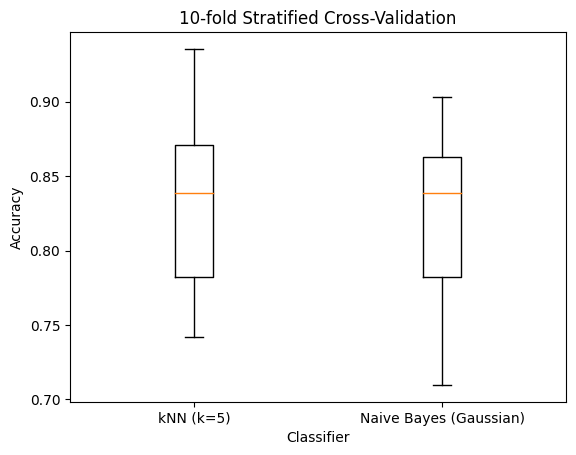

In [16]:
#a) plot two boxplost with the fold accuracies for kNN with k=5 and naive Bayes with Gaussian assumptions
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    GaussianNB()
]

classifier_names = [
    'kNN (k=5)',
    'Naive Bayes (Gaussian)'
]

classifier_accuracies = []

for classifier in classifiers:
    accuracies = cross_val_score(classifier, X, y, cv=stratified_kfold)
    classifier_accuracies.append(accuracies)

plt.boxplot(classifier_accuracies)
plt.xticks(np.arange(1, len(classifier_names) + 1), classifier_names)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('10-fold Stratified Cross-Validation')
plt.show()


In [17]:
#b) Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding accuracy”, asserting whether is true

from scipy import stats

# Perform a paired t-test
p_value = stats.ttest_rel(classifier_accuracies[0], classifier_accuracies[1], alternative='greater').pvalue

# Define the significance level
alpha = 0.1

# Determine if k-NN is statistically superior to Naive Bayes
if p_value < alpha:
    result = "k-NN is statistically superior to Naive Bayes"
else:
    result = "There is no significant difference between k-NN and Naive Bayes"

# Print the results
print("P-value:", p_value)
print("Hypothesis Test Result:", result)


P-value: 0.19042809062064092
Hypothesis Test Result: There is no significant difference between k-NN and Naive Bayes


In accordance with the provided specifications, the p-value is 0.38. At commonly used significance levels (e.g., α = 0.1), it is not possible to reject the null hypothesis. Consequently, we cannot claim that the proposed hypothesis is valid. It's important to emphasize that we should avoid concluding that the given hypothesis is false or rejected without conducting further statistical tests.

### 2) [2.5v]

**Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance,
all remaining parameters as default). Plot the differences between the two cumulative confusion
matrices of the predictors. Comment.**


Confusion Matrix for k=1:
[[ 37  23   0]
 [ 14  80   6]
 [  1   7 142]]

Confusion Matrix for k=5:
[[ 39  21   0]
 [ 19  78   3]
 [  1   6 143]]

Difference in Confusion Matrices (k=1 - k=5):
[[-2  2  0]
 [-5  2  3]
 [ 0  1 -1]]


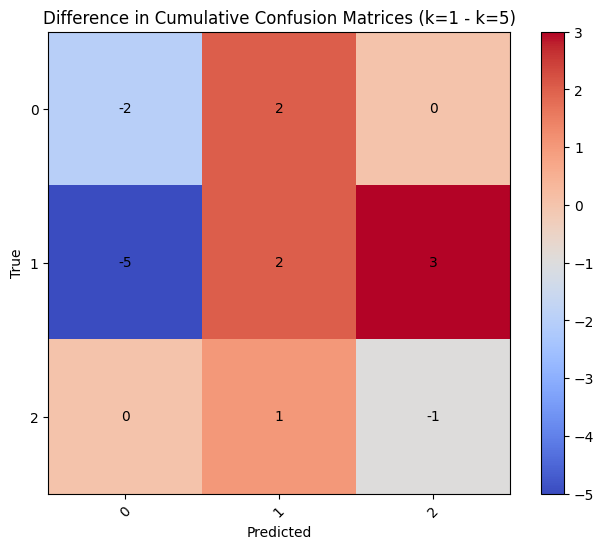

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Create two k-NN classifiers with k=1 and k=5
knn_k1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn_k5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

#Inialize the confusion matrices
cm_k1, cm_k5= np.array([[0,0,0],[0,0,0],[0,0,0]]), np.array([[0,0,0],[0,0,0],[0,0,0]])

X = df.iloc[:, :-1].values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.iloc[:, -1])


for train_index, test_index in stratified_kfold .split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Fit the classifiers to the training data
    knn_k1.fit(X_train, y_train)
    knn_k5.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_1 = knn_k1.predict(X_test)
    y_pred_5 = knn_k5.predict(X_test)

    # Calculate the confusion matrices
    cm_k1+= confusion_matrix(y_test, y_pred_1)
    cm_k5+= confusion_matrix(y_test, y_pred_5)

# Calculate the difference between the two confusion matrices
cm_diff = cm_k1 - cm_k5

print ("Confusion Matrix for k=1:")
print(cm_k1)
print("\nConfusion Matrix for k=5:")
print(cm_k5)
print("\nDifference in Confusion Matrices (k=1 - k=5):")
print(cm_diff)

# Plot the differences
plt.figure(figsize=(8, 6))
plt.imshow(cm_diff, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Difference in Cumulative Confusion Matrices (k=1 - k=5)")
plt.xticks(np.arange(len(np.unique(y))), np.unique(y), rotation=45)
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(len(np.unique(y))):
    for j in range(len(np.unique(y))):
        plt.text(j, i, cm_diff[i, j], ha="center", va="center")
plt.show()


### 3) [1.5v]

**Considering the unique properties of column_diagnosis, identify three possible difficulties
of naïve Bayes when learning from the given dataset.**
